# CSCI4022 Homework 3; Clustering

## Due Monday, February 22 at 11:59 pm to Canvas

#### Submit this file as a .ipynb with *all cells compiled and run* to the associated dropbox.

***

Your solutions to computational questions should include any specified Python code and results as well as written commentary on your conclusions.  Remember that you are encouraged to discuss the problems with your classmates, but **you must write all code and solutions on your own**.

**NOTES**: 

- Any relevant data sets should be available on Canvas. To make life easier on the graders if they need to run your code, do not change the relative path names here. Instead, move the files around on your computer.
- If you're not familiar with typesetting math directly into Markdown then by all means, do your work on paper first and then typeset it later.  Here is a [reference guide](https://math.meta.stackexchange.com/questions/5020/mathjax-basic-tutorial-and-quick-reference) linked on Canvas on writing math in Markdown. **All** of your written commentary, justifications and mathematical work should be in Markdown.  I also recommend the [wikibook](https://en.wikibooks.org/wiki/LaTeX) for LaTex.
- Because you can technically evaluate notebook cells is a non-linear order, it's a good idea to do **Kernel $\rightarrow$ Restart & Run All** as a check before submitting your solutions.  That way if we need to run your code you will know that it will work as expected. 
- It is **bad form** to make your reader interpret numerical output from your code.  If a question asks you to compute some value from the data you should show your code output **AND** write a summary of the results in Markdown directly below your code. 
- 45 points of this assignment are in problems.  The remaining 5 are for neatness, style, and overall exposition of both code and text.
- This probably goes without saying, but... For any question that asks you to calculate something, you **must show all work and justify your answers to receive credit**. Sparse or nonexistent work will receive sparse or nonexistent credit. 
- There is *not a prescribed API* for these problems.  You may answer coding questions with whatever syntax or object typing you deem fit.  Your evaluation will primarily live in the clarity of how well you present your final results, so don't skip over any interpretations!  Your code should still be commented and readable to ensure you followed the given course algorithm.

---

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.api as sm


***
<a/ id='p4'></a>
[Back to top](#top)
# Problem 1 (Theory: GMM; 5 pts) 
In the GMM slides, we stated that the weights $w_m$ of the 1-dimensional GMM with pdf

$f(x|\theta)=w_1\phi(x|\mu_1, \sigma_1^2)+w_2\phi(x|\mu_2, \sigma_2^2)+\dots+ w_m\phi(x|\mu_m, \sigma_m^2)$

required the weights to sum to one.  

#### a) Use the following markdown cell to prove this statement.  In a sentence, describe how this proof might change in higher dimensions.

Well, lecture and Piazza helped me out a ton with this problem, as I hate proofs and didn't *really* know where to start. I suppose I'm *still* not really sure where to go, but at the core, a GMM is a way for us to model probability (like the probability that a random person chosen from our Chuckie Cheese GMM is a given age). 

Going back to the slides and getting a little help from my friend Google, we generally operate under the assumption that all of our data is to be explained by the model. 

#### b) Is it possible to have a valid pdf $f(x)$ above if any of the weights $w_k$ are negative?  If not, why not?  If so, what other difficulties might be associated with negative weights?

# Problem 2 (Simulation: GMMs and simulated data; 20 pts)

The code below loads up a dataset tracking the eruptions of the geyser Old Faithful in Yellowstone.  It has two features:

- eruptions; numeric; Eruption time in mins
- waiting; numeric; Waiting time to next eruption (in mins)

As the plot shows, these two variables are highly related, and we observe a data set that clearly has multiple distinct modes.

Our goal in this problem is not only to capture the data set with the GMM, but to capture it well enough to simulate *new* eruptions from the original distribution.

   eruptions  waiting
0      3.600       79
1      1.800       54
2      3.333       74
3      2.283       62
4      4.533       85


/usr/local/lib/python3.7/site-packages/statsmodels/datasets/utils.py:192: FutureWarning: `item` has been deprecated and will be removed in a future version
  return dataset_meta["Title"].item()


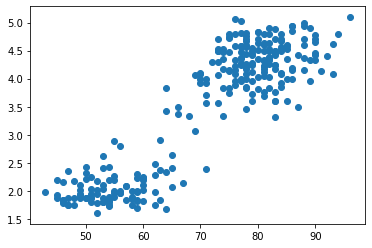

In [2]:
ff= sm.datasets.get_rdataset('faithful').data
print(ff.head())
plt.scatter(ff['waiting'], ff['eruptions'])

In [60]:
'''
mu1, mu2 = 10, 38
var1, var2 = 7, 20
pi = 0.50
p_class1 = 1-pi
p_class2 = pi

#k=2 EM
for _ in range(100): #100 steps is fine; or a tolerance check.
    # Expectation step:
    np.random.multivariate_normal([0,0], [[1,.1],[.1,1]],10)  #sample of size j=10 rho=.1  N(0,1)

    p_data_given_class1 = stats.norm.pdf(dfA[0], loc=mu1, scale=np.sqrt(var1))
    p_data_given_class2 = stats.norm.pdf(dfA[0], loc=mu2, scale=np.sqrt(var2))

    p_class1_given_data = p_data_given_class1*p_class1
    p_class2_given_data = p_data_given_class2*p_class2

    summ = p_class1_given_data + p_class2_given_data
    p_class1_given_data = p_class1_given_data / summ
    p_class2_given_data = p_class2_given_data / summ

    # Maximization step:
    n_class1 = np.sum(p_class1_given_data)
    n_class2 = np.sum(p_class2_given_data)

    pi = n_class2/len(dfA)
    p_class1 = 1-pi
    p_class2 = pi

    mu1 = (1/n_class1)*np.sum(p_class1_given_data*dfA[0])
    mu2 = (1/n_class2)*np.sum(p_class2_given_data*dfA[0])

    var1 = (1/n_class1)*np.sum(p_class1_given_data*((dfA[0]-mu1)**2))
    var2 = (1/n_class2)*np.sum(p_class2_given_data*((dfA[0]-mu2)**2))

print(mu1, mu2)
print(var1, var2)
print(pi, n_class1)
'''

class EMAlgo:
    def __init__(self, data, k):
        self.data  = data
        self.k     = k
        self.means = self.init_means() 
        print(self.k)
        print(self.means)
        print(np.cov(self.means), np.cov(self.means).shape)
        
    def init_means(self):
        rows = np.random.choice([i for i in range(self.data.shape[0])], size=self.k, replace=True)
        cols = np.random.choice([i for i in range(self.data.shape[1])], size=self.k, replace=True)
        means = [self.data[rows[i], cols[i]] for i in range(self.k)]
        return means 

## Part A: Fit Models

Run 5 different 2-D Gaussian Mixture Models on the given data with $k=2, 4, 6, 8, 10$ components.  You may use any form of intialization, but I recommend randomness for ease of use/repetition.

Plot their "elbow plot" of $k$ versus mean-distance-to-centroid.  Does it look like there is a best choice of $k$ from these options?  Does this match your intuition?  Explain.

In [61]:
for k in range(2, 12, 2):
    EMAlgo(ff.to_numpy(), k)

2
[80.0, 2.017]
3040.6741445 ()
4
[2.2, 4.75, 75.0, 79.0]
1805.7256249999996 ()
6
[89.0, 86.0, 80.0, 84.0, 1.867, 4.6]
1781.280868166667 ()
8
[77.0, 4.7, 82.0, 53.0, 4.083, 46.0, 85.0, 53.0]
1024.2287504107142 ()
10
[77.0, 59.0, 2.167, 88.0, 3.917, 53.0, 75.0, 4.583, 4.3660000000000005, 4.15]
1320.8494637888887 ()


## Part B: Simulate from Models

Because the GMM is a *generative* model, we could use our results from part $A$ to not only score models based on their mean-distance-to-centroid (or other statistical measures like AIC, BIC), we could simulate points from the models and visually ascertain whether or not they appear similar to the original distribution.

For each of the 5 GMM models in part a), simulate 272 points from your estimated density function (recall: this is a two-part simulation of choosing a component **then** drawing from the normal of appropriate mean/covariance).

Create a figure with 2 columns and 3 rows holding all 6 data sets: the 5 simulated ones and the original data shown above.  Label each plot appropriately.  

## Part C: Discussion

Which plot or plots look closest to the original data?  Depending on your interpretations of the elbow plot versus the simulated data, you may have decided that we wanted a different value of $k$ for the best model to *simulate* from rather than the best model to *cluster* or classify upon.  Do you think that this is normally the case?  Why or why not?  What properties of a data set would make one task easier or harder with more or less $k$?

---

While I could probably say there are *many* points of confusion for myself, I would say GMM's and the EM algo specifically makes the least amount of sense to me. I'm already two days late, and I really don't see me making enough progress on this in the next two days where I feel better turning this in, so I'm just gonna take the L again. Plus, I'm hype that Zach is going over some more of these pen and paper examples on Friday so I can hopefully see what I was missing. At this point, it feels like I'm missing a whole lot. 

The only thing I was *able* to do, was initialize the means. Not *really* sure how to initialize the variances from, and then past that, I really struggled translating the EMAlgo code into something I could do by passing in $k$ as a parameter. This made a whole lot more sense when we were talking Chuckie Cheese with what I think to be $k=2$? I suppose changing $k$ might be a source for some of my confusion.

Either way, enjoying the class a lot, I just struggle at applying some of the stuff.

---



# Problem 3 (Practice:k-means and clustering similarities; 20 pts)

Our goal in this problem is to get a better understanding of two important facets of clustering: ways to compare between clusters and how much initialization might matter for e.g. kmeans.

The code below loads up a well known dataset extracted from the 1974 Motor Trend US magazine, and comprises fuel consumption and 10 aspects of automobile design and performance for 32 automobiles (1973–74 models).  The columns are:

- mpg:	Miles/(US) gallon
- cyl:	Number of cylinders
- disp:	Displacement (cu.in.)
-  hp:	Gross horsepower
- drat:	Rear axle ratio
- wt:	Weight (1000 lbs)
- qsec:	1/4 mile time
- vs:	Engine (0 = V-shaped, 1 = straight)
- am:	Transmission (0 = automatic, 1 = manual)
- gear:	Number of forward gears
- carb:	Number of carburetors

We're going to attempt to cluster this data using **4** of these columns: mpg, disp, wt, and qsec.

                mpg  cyl   disp   hp  drat     wt   qsec  vs  am  gear  carb
Mazda RX4      21.0    6  160.0  110  3.90  2.620  16.46   0   1     4     4
Mazda RX4 Wag  21.0    6  160.0  110  3.90  2.875  17.02   0   1     4     4
Datsun 710     22.8    4  108.0   93  3.85  2.320  18.61   1   1     4     1


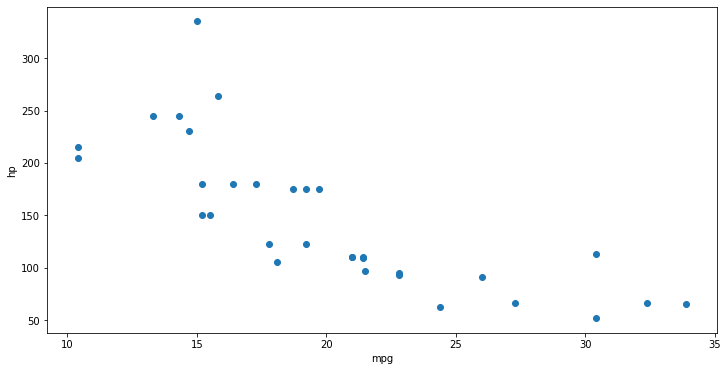

In [3]:
cars= sm.datasets.get_rdataset('mtcars').data
print(cars.head(3))

#example plot of mpg x hp
fig, ax= plt.subplots(figsize=(12,6))
plt.scatter(cars['mpg'], cars['hp'])
ax.set_xlabel('mpg')
ax.set_ylabel('hp');

In [4]:
def dist(a, b):
    return np.sqrt(np.sum([((a[i]-b[i]) ** 2) for i in range(len(a))]))

class Cluster:
    def __init__(self, dim):
        self.points   = []
        self.centroid = None
        self.avg_dist = 0
        self.dim      = dim
    
    def __repr__(self):
        return "Points: {}\nAvg. Distance: {}\nCentroid: {}".format(self.points, self.avg_dist, self.centroid)
    
    def compute_centroid(self):
        self.centroid = np.mean(self.points, axis=0)
    
    def add_point(self, point):
        self.points.append(point)
        self.compute_centroid()
    
    def remove_points(self):
        self.points = []
        
class KMeans:
    def __init__(self, points, k):
        self.all_points = points
        self.num_points = points.shape[0]
        self.clusters   = []
        self.classes    = []
        self.dim        = points.shape[1]
        self.k          = k
    
    def init_clusters(self):
        init_pts = [self.all_points[i] for i in np.random.choice([i for i in range(self.num_points)], size=self.k, replace=False)]
        for i in range(self.k):
            cluster = Cluster(self.dim)
            cluster.add_point(init_pts[i])
            self.clusters.append(cluster)

    def rm_pts(self):
        for i in range(self.k):
            self.clusters[i].remove_points()
    
    def run_once(self):
        self.rm_pts()
        temp_classes = self.classes
        self.classes = []
        centroids = [self.clusters[i].centroid for i in range(self.k)]
        for i in range(self.num_points):
            point = self.all_points[i]
            distances = []
            for centroid in centroids:
                distances.append(dist(point, centroid))
            min_index = np.argmin(distances)
            self.classes.append(min_index)
            if distances[min_index] != 0:
                cluster = self.clusters[min_index]
                cluster.add_point(point)
        return temp_classes == self.classes 
        
    def run(self, verbose=False):
        self.init_clusters()
        change = self.run_once()
        while not change:
            change = self.run_once()
        if verbose:
            print(self.classes)
            for i in range(self.k):
                print(len(self.clusters[i].points))
                print(self.clusters[i])
    

## Part A) K-means and Normalization: Intuition

The first question we should ask is whether or not to normalize our data.  Use the pandas methods `describe` on the data frame.  What do you expect to happen if we cluster without normalizing the data?  Why?



In [5]:
cars.describe()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
count,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.0000
mean,20.090625,6.187500,230.721875,146.687500,3.596563,3.217250,17.848750,0.437500,0.406250,3.687500,2.8125
std,6.026948,1.785922,123.938694,68.562868,0.534679,0.978457,1.786943,0.504016,0.498991,0.737804,1.6152
min,10.400000,4.000000,71.100000,52.000000,2.760000,1.513000,14.500000,0.000000,0.000000,3.000000,1.0000
25%,15.425000,4.000000,120.825000,96.500000,3.080000,2.581250,16.892500,0.000000,0.000000,3.000000,2.0000
50%,19.200000,6.000000,196.300000,123.000000,3.695000,3.325000,17.710000,0.000000,0.000000,4.000000,2.0000
75%,22.800000,8.000000,326.000000,180.000000,3.920000,3.610000,18.900000,1.000000,1.000000,4.000000,4.0000
max,33.900000,8.000000,472.000000,335.000000,4.930000,5.424000,22.900000,1.000000,1.000000,5.000000,8.0000


## Part B) K-means and Normalization: First Clusters 

Now do initial, unnormalized clustering for $k=3$.  Save the final cluster for each point.  Plot the final clusters on an `mpg` versus `disp` axis.

No handles with labels found to put in legend.


[2, 2, 2, 1, 0, 1, 0, 2, 2, 2, 2, 1, 1, 1, 0, 0, 0, 2, 2, 2, 2, 1, 1, 0, 0, 2, 2, 2, 0, 2, 1, 2]
8
Points: [array([ 18.7 , 360.  ,   3.44,  17.02]), array([ 14.3 , 360.  ,   3.57,  15.84]), array([ 10.4 , 472.  ,   5.25,  17.98]), array([ 10.4  , 460.   ,   5.424,  17.82 ]), array([ 14.7  , 440.   ,   5.345,  17.42 ]), array([ 13.3 , 350.  ,   3.84,  15.41]), array([ 19.2  , 400.   ,   3.845,  17.05 ]), array([ 15.8 , 351.  ,   3.17,  14.5 ])]
Avg. Distance: 0
Centroid: [ 14.6    399.125    4.2355  16.63  ]
8
Points: [array([ 21.4  , 258.   ,   3.215,  19.44 ]), array([ 18.1 , 225.  ,   3.46,  20.22]), array([ 16.4 , 275.8 ,   4.07,  17.4 ]), array([ 17.3 , 275.8 ,   3.73,  17.6 ]), array([ 15.2 , 275.8 ,   3.78,  18.  ]), array([ 15.5 , 318.  ,   3.52,  16.87]), array([ 15.2  , 304.   ,   3.435,  17.3  ]), array([ 15.  , 301.  ,   3.57,  14.6 ])]
Avg. Distance: 0
Centroid: [ 16.7625  279.175     3.5975   17.67875]
16
Points: [array([ 21.  , 160.  ,   2.62,  16.46]), array([ 21.   , 16

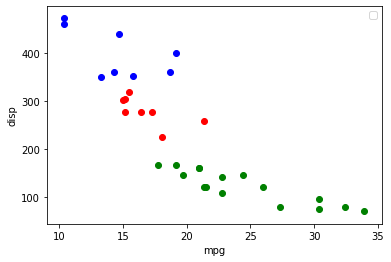

In [6]:
k=3

columns = ['mpg', 'disp', 'wt', 'qsec']
rm = ['cyl', 'hp', 'drat', 'vs', 'am', 'gear', 'carb']

plotting = ['mpg', 'disp']

unnormalized_data = cars.drop(columns=rm)

data1 = unnormalized_data.to_numpy()

kmeans = KMeans(data1, k)
kmeans.run(True)

classes1 = kmeans.classes

colors = {0: 'b', 1: 'r', 2: 'g'}
for i in range(len(data1)):
    c = colors[classes1[i]]
    plt.scatter(data1[i,0],data1[i,1],c=c)
plt.xlabel('mpg')
plt.ylabel('disp')
plt.legend()
plt.show()

## Part C) K-means and Normalization: An Alternative

Normalize the 4 columns being used by replacing each with their Box-Muller transformation (for each column, subtract the mean of that column then divide by its standard deviation).  Repeat your clustering for $k=3$, again saving the final cluster for each point.  Plot the final clusters on an `mpg` versus `disp` axis.

Then answer: do the clusterings look different?

No handles with labels found to put in legend.


[1, 1, 2, 2, 0, 2, 0, 2, 2, 1, 1, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 0, 0, 0, 0, 2, 1, 1, 0, 1, 0, 1]
14
Points: [array([-0.23073453,  1.04308123,  0.22765425, -0.46378082]), array([-0.96078893,  1.04308123,  0.36051645, -1.12412636]), array([-0.61235388,  0.36371309,  0.87152487, -0.25112717]), array([-0.46302456,  0.36371309,  0.52403914, -0.1392042 ]), array([-0.81145962,  0.36371309,  0.57513999,  0.08464175]), array([-1.60788262,  1.94675381,  2.07750476,  0.07344945]), array([-1.60788262,  1.84993175,  2.2553357 , -0.01608893]), array([-0.89442035,  1.68856165,  2.17459637, -0.23993487]), array([-0.76168319,  0.70420401,  0.3094156 , -0.54772305]), array([-0.81145962,  0.59124494,  0.22254417, -0.30708866]), array([-1.12671039,  0.96239618,  0.636461  , -1.36476075]), array([-0.1477738 ,  1.36582144,  0.64157108, -0.44699237]), array([-0.71190675,  0.97046468, -0.0482903 , -1.87401028]), array([-0.84464392,  0.56703942,  0.36051645, -1.8180488 ])]
Avg. Distance: 0
Centroid: [-0.828051

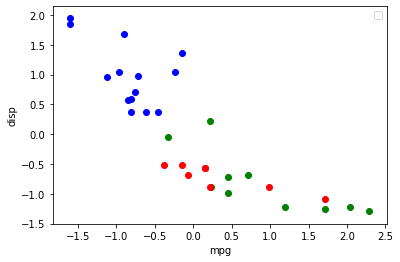

In [7]:
normalized_data = cars.drop(columns=rm)

for col in columns:
    normalized_data[col] = normalized_data[col].apply(lambda x: (x - normalized_data[col].mean()) / normalized_data[col].std()) 

data2 = normalized_data.to_numpy()

kmeans = KMeans(data2, k)
kmeans.run(True)

classes2 = kmeans.classes

colors = {0: 'b', 1: 'r', 2: 'g'}
for i in range(len(data1)):
    c = colors[classes2[i]]
    plt.scatter(data2[i,0],data2[i,1],c=c)
plt.xlabel('mpg')
plt.ylabel('disp')
plt.legend()
plt.show()



## Part D) The Rand Statistic
We need to formalize wheter or not normalizing actually mattered, which requires a measurement of whether or not two clusterings are actually different from one another! 

To do this we are going to use the Rand statistic, with documentation here: 

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.adjusted_rand_score.html

Use the `adjusted_rand_score` metric loaded below and compare the two clusterings from parts A and B.

In [8]:
from sklearn.metrics.cluster import adjusted_rand_score
print(adjusted_rand_score([1, 0, 1], [0,1,0])) #example that's actually the same assignments!
print(adjusted_rand_score([1, 0, 1], [0,0,1])) #example: Rand score is negative if very different

#How do your clusters compare?
print(adjusted_rand_score(classes1, classes2)) #example: Rand score is negative if very different

1.0
-0.49999999999999994
0.3739180611656087




## Part E) ...and then repeat.

Of course, it turns out that kmeans might *also* depend on initializations, and we want to make sure that random initializations aren't affecting your clusters in parts A and B.  One way to ensure that we don't get "unlucky" results is to repeat our experiment with many different initializations, and then choose the "best" one.  A Rand statistic gives us a mechanism to do this!


### E. i) 
Run k-means 100 times for $k=3$ on the *unnormalized* data, each with a different random initialization.

In other words, perform the following operations 100 times:

    1) Initialize k-means by randomly selecting `k' of your data points
    2) Run k-means until convergence
    3) Save the final cluster for each point
    
    
A few rows of your final k=3 output might be:

`dfk3.head(3)'

| Point # | Run1 | Run2 | Run3 | ... | Run 100 |
| --- | --- |
| 1 | 1 | 2 | 1| ... | 1 |
| 2 | 3 | 1 | 3 | ... | 3|
| 3 | 1 | 2 | 1 | ... | 1|

(so in this example, points 1 & 3 were always in the same cluster, but point 2 was elsewhere)



In [9]:
iters = 100
 
cols = ["Run{}".format(i + 1) for i in range(iters)]

df1 = pd.DataFrame(columns = cols).rename_axis("Point #", axis="columns")

for i in range(iters):
    kmeans = KMeans(data1, k)
    kmeans.run()
    df1["Run{}".format(i + 1)] = kmeans.classes
df1.head(15)

Point #,Run1,Run2,Run3,Run4,Run5,Run6,Run7,Run8,Run9,Run10,...,Run91,Run92,Run93,Run94,Run95,Run96,Run97,Run98,Run99,Run100
0,0,1,0,0,1,0,1,0,2,0,...,1,1,2,1,1,1,2,1,2,1
1,0,1,0,0,1,0,1,0,2,0,...,1,1,2,1,1,1,2,1,2,1
2,0,1,2,0,1,1,1,0,2,0,...,1,1,0,1,1,0,2,0,2,2
3,1,2,0,1,2,2,0,2,0,2,...,2,2,1,0,0,1,1,2,1,0
4,2,0,1,2,0,2,2,1,1,1,...,0,2,1,2,2,2,0,2,0,0
5,1,2,0,1,2,0,0,2,0,2,...,2,2,2,0,0,1,1,1,1,1
6,2,0,1,2,0,2,2,1,1,1,...,0,2,1,2,2,2,0,2,0,0
7,0,1,0,0,1,0,1,0,2,0,...,1,1,2,1,1,1,2,1,2,1
8,0,1,0,0,1,0,1,0,2,0,...,1,1,2,1,1,1,2,1,2,1
9,0,1,0,0,1,0,1,0,2,0,...,1,1,2,1,1,1,2,1,2,1


### E. ii) 
Run k-means 100 times for $k=3$ on the *normalized* data, each with a different random initialization.  Save the results in another data frame.

In [10]:
df2 = pd.DataFrame(columns = cols).rename_axis("Point #", axis="columns")

for i in range(iters):
    kmeans = KMeans(data2, k)
    kmeans.run()
    df2["Run{}".format(i + 1)] = kmeans.classes
df2.head(15)

Point #,Run1,Run2,Run3,Run4,Run5,Run6,Run7,Run8,Run9,Run10,...,Run91,Run92,Run93,Run94,Run95,Run96,Run97,Run98,Run99,Run100
0,1,2,0,0,1,2,2,1,0,0,...,2,2,2,2,1,0,1,0,0,0
1,1,2,0,0,1,2,2,1,0,0,...,2,2,0,2,1,0,1,0,0,0
2,1,2,2,0,0,2,1,1,0,2,...,0,2,2,2,2,0,2,0,1,0
3,2,2,1,0,0,2,0,1,1,0,...,0,2,0,2,1,1,1,0,0,0
4,2,1,0,1,1,0,0,0,2,1,...,1,0,1,0,1,2,0,1,2,1
5,2,2,1,0,0,2,0,1,1,0,...,0,2,0,0,1,1,1,0,0,0
6,0,1,0,1,1,0,0,0,2,1,...,1,0,1,0,1,2,0,1,2,1
7,1,2,2,0,0,2,1,1,1,2,...,0,2,0,2,2,1,2,0,1,0
8,1,2,2,0,0,2,1,1,1,2,...,0,2,0,2,2,1,2,0,1,0
9,2,2,1,0,1,2,0,1,1,0,...,0,2,0,0,1,1,1,0,0,0


### E. iii) 

For the 100 runs on the unnormalized data, create a similarity matrix of all-pairwise Rand scores.  Select the run with the highest overall summed Rand scores as the "most indicative run" (note: this is actually the clustroid of the clusters, if we consider Rand similarity an approximate distance!).


In [11]:
sim_mat1 = np.zeros((iters, iters))
sums1 = []

for i in range(iters):
    for j in range(iters):
        sim_mat1[i, j] = adjusted_rand_score(df1["Run{}".format(i + 1)], df1["Run{}".format(j + 1)])
    sums1.append(np.sum(sim_mat1[i]))
print(sim_mat1)
print(sums1, len(sums1))

print(max(sums1))
print(np.argmax(sums1))
winners1 = [i for i, j in enumerate(sums1) if j == max(sums1)] # idk why but I have like 10-15 best runs...
print(winners1)

[[1.         1.         0.38653763 ... 0.41359693 0.87733183 0.40905833]
 [1.         1.         0.38653763 ... 0.41359693 0.87733183 0.40905833]
 [0.38653763 0.38653763 1.         ... 0.71297853 0.37247864 0.90041797]
 ...
 [0.41359693 0.41359693 0.71297853 ... 1.         0.4166254  0.81312234]
 [0.87733183 0.87733183 0.37247864 ... 0.4166254  1.         0.41238509]
 [0.40905833 0.40905833 0.90041797 ... 0.81312234 0.41238509 1.        ]]
[70.86430151911571, 70.86430151911571, 56.23991274155602, 70.86430151911571, 70.86430151911571, 61.48081750943707, 70.86430151911571, 70.86430151911571, 70.86430151911571, 70.86430151911571, 61.243124967522824, 61.243124967522824, 70.86430151911571, 61.48081750943707, 70.86430151911571, 56.23991274155602, 61.48081750943707, 70.13327165319805, 70.86430151911571, 70.86430151911571, 61.243124967522824, 70.13327165319805, 61.243124967522824, 56.23991274155602, 61.243124967522824, 61.243124967522824, 61.48081750943707, 70.86430151911571, 70.86430151911571

The final thing I've printed, are all of the indices where we have the maximum observed similarity score. Index 0 represents Run1 and index 4 represents Run5. I find it weird that multiple runs were scored the exact same thing.


### E. iv) 

For the 100 runs on the normalized data, create a similarity matrix of all-pairwise Rand scores.  Select the run with the highest overall summed Rand scores as the "most indicative run" (note: this is actually the clustroid of the clusters, if we consider Rand similarity an approximate distance!).



In [12]:
sim_mat2 = np.zeros((iters, iters))
sums2 = []

for i in range(iters):
    for j in range(iters):
        sim_mat2[i, j] = adjusted_rand_score(df2["Run{}".format(i + 1)], df2["Run{}".format(j + 1)])
    sums2.append(np.sum(sim_mat2[i]))
print(sim_mat2)
print(sums2, len(sums2))

print(max(sums2))
print(np.argmax(sums2))
winners2 = [i for i, j in enumerate(sums2) if j == max(sums2)] # idk why but I have like 10-15 best runs...
print(winners2)

[[1.         0.27266264 0.61283061 ... 0.37297777 0.40791269 0.27266264]
 [0.27266264 1.         0.20273349 ... 0.48471736 0.74804064 1.        ]
 [0.61283061 0.20273349 1.         ... 0.30134771 0.41339492 0.20273349]
 ...
 [0.37297777 0.48471736 0.30134771 ... 1.         0.4816555  0.48471736]
 [0.40791269 0.74804064 0.41339492 ... 0.4816555  1.         0.74804064]
 [0.27266264 1.         0.20273349 ... 0.48471736 0.74804064 1.        ]]
[39.23945650508248, 60.492519364346805, 36.03554158746222, 52.75857567810219, 45.52580832640432, 52.75857567810219, 44.288259152798986, 60.492519364346805, 57.84372238463736, 58.92961443051071, 56.14181093828538, 45.52580832640432, 42.622505514437684, 60.492519364346805, 58.1263840146006, 51.57224201622559, 45.62834252486624, 60.492519364346805, 60.492519364346805, 42.622505514437684, 57.2411436271045, 36.03554158746222, 42.622505514437684, 52.75857567810219, 52.75857567810219, 45.268456390967046, 44.04364923825432, 57.84372238463736, 51.572242016225

The final thing I've printed, are all of the indices where we have the maximum observed similarity score. Index 0 represents Run1 and index 9 represents Run10. I find it weird that multiple runs were scored the exact same thing, much like above.... Probably indicates an error I've made somewhere.

### E. v)  

Compare the two runs selected by parts E.iii and E.iv.  Are they identical, or can we definititely say that normalization effects the clustering in this problem?


In [13]:
scores = []
for w1 in winners1:
    for w2 in winners2:
        score = adjusted_rand_score(df1["Run{}".format(w1 + 1)], df2["Run{}".format(w2 + 1)])
        print("Run{} (unnormalized data) --- Run{} (normalized data) --- Similarity score: {}".format(w1+1, w2+1, score))
        scores.append(score)
print("The max similarity score we observe between the normalized data and the unnormalized data is: ", max(scores))

Run1 (unnormalized data) --- Run61 (normalized data) --- Similarity score: 0.4096941719561454
Run1 (unnormalized data) --- Run84 (normalized data) --- Similarity score: 0.4096941719561454
Run1 (unnormalized data) --- Run99 (normalized data) --- Similarity score: 0.4096941719561454
Run2 (unnormalized data) --- Run61 (normalized data) --- Similarity score: 0.4096941719561454
Run2 (unnormalized data) --- Run84 (normalized data) --- Similarity score: 0.4096941719561454
Run2 (unnormalized data) --- Run99 (normalized data) --- Similarity score: 0.4096941719561454
Run4 (unnormalized data) --- Run61 (normalized data) --- Similarity score: 0.4096941719561454
Run4 (unnormalized data) --- Run84 (normalized data) --- Similarity score: 0.4096941719561454
Run4 (unnormalized data) --- Run99 (normalized data) --- Similarity score: 0.4096941719561454
Run5 (unnormalized data) --- Run61 (normalized data) --- Similarity score: 0.4096941719561454
Run5 (unnormalized data) --- Run84 (normalized data) --- Sim

Well, judging by the fact that literally every similarity score we see in the output above is non-negative, but it also isn't $1.0$ either. In any case, I assume I've done somethign wrong. Furthermore, it seems weird that I had multiple maximum values from the 100 runs I perform on the two sets of data (normalized and unnormalized). This is probably where my initial problem lies, but I'm too late to try and fix it now.

Ultimately, while I hypothesized that the max score would not be $1.0$ because I had a feeling that normalization might have *some* effect on the custering we do in this problem, I truly didn't think I'd have to loop through the best runs from the two different experiments. But from what I've gleaned, normalization does have an effect on the clustering we do in this problem.

## Part F) Visualize
Plot the best $k=3$ cluster resulting from clustering the *normalized* data, but use the original data scale in the plot.  Use mpg versus displacement for the axes.  Color the clusters, and label each point with the car name.

No handles with labels found to put in legend.


[1, 1, 2, 1, 0, 1, 0, 2, 2, 1, 1, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 0, 0, 0, 0, 2, 2, 2, 0, 1, 0, 1]
['Mazda RX4', 'Mazda RX4 Wag', 'Datsun 710', 'Hornet 4 Drive', 'Hornet Sportabout', 'Valiant', 'Duster 360', 'Merc 240D', 'Merc 230', 'Merc 280', 'Merc 280C', 'Merc 450SE', 'Merc 450SL', 'Merc 450SLC', 'Cadillac Fleetwood', 'Lincoln Continental', 'Chrysler Imperial', 'Fiat 128', 'Honda Civic', 'Toyota Corolla', 'Toyota Corona', 'Dodge Challenger', 'AMC Javelin', 'Camaro Z28', 'Pontiac Firebird', 'Fiat X1-9', 'Porsche 914-2', 'Lotus Europa', 'Ford Pantera L', 'Ferrari Dino', 'Maserati Bora', 'Volvo 142E']


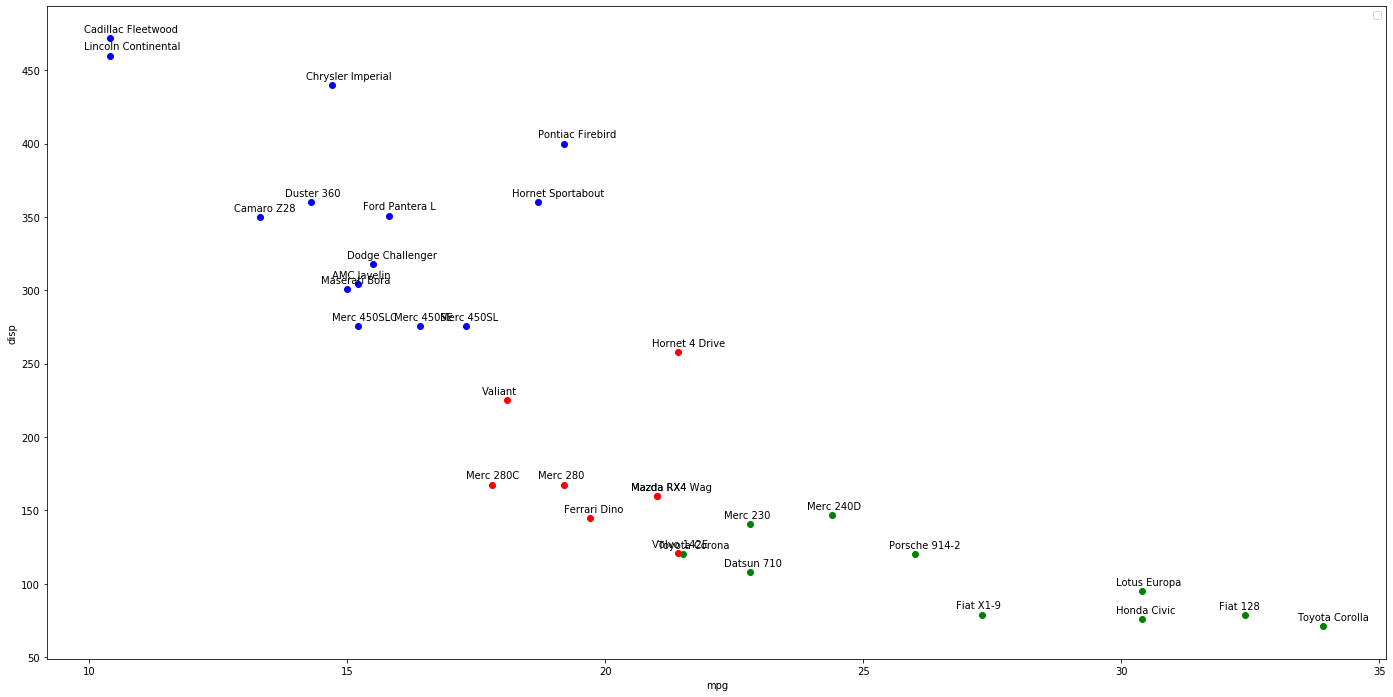

In [37]:
classes = df2["Run{}".format(winners2[0] + 1)]
print(list(classes))

fig, ax = plt.subplots(figsize=(24, 12))

for i in range(len(data1)):
    c = colors[classes[i]]
    ax.scatter(data1[i,0],data1[i,1],c=c)

car_names = cars.index 
print(list(car_names))
# https://stackoverflow.com/questions/14432557/matplotlib-scatter-plot-with-different-text-at-each-data-point
for i, txt in enumerate(car_names):
    ax.annotate(txt, (data1[i,0] - 0.5, data1[i,1] + 4))

plt.xlabel('mpg')
plt.ylabel('disp')
plt.legend()
plt.show()